# Assignment Name:
Waste Material Segregation for Improving Waste Management

# Candidate Name:
Poulami Das Bhunia

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
import sklearn as sk

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path ='/content/drive/MyDrive/Assignments/CNN/Dataset_Waste_Segregation.zip'
file_path = '/content/drive/MyDrive/assignment/Dataset_Waste_Segregation.zip'

Load the dataset.

In [6]:
# Load and unzip the dataset

import zipfile
import os
import shutil

zip_file_path = file_path

extracted_path = '/content/Dataset_Waste_Segregation'

if os.path.exists(extracted_path):
    shutil.rmtree(extracted_path)
    print(f"Removed existing directory: {extracted_path}")
else:
    print(f"Directory does not exist: {extracted_path}")
os.makedirs(extracted_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Dataset unzipped to: {extracted_path}")

# Check for and extract any nested zip files
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        if file.endswith(".zip"):
            nested_zip_path = os.path.join(root, file)
            nested_extracted_path = os.path.join(root, os.path.splitext(file)[0])
            print(f"Found nested zip file: {nested_zip_path}")
            try:
                with zipfile.ZipFile(nested_zip_path, 'r') as nested_zip_ref:
                    nested_zip_ref.extractall(nested_extracted_path)
                print(f"Nested zip file extracted to: {nested_extracted_path}")
                os.remove(nested_zip_path)
                print(f"Removed nested zip file: {nested_zip_path}")
            except zipfile.BadZipFile:
                print(f"Error: Could not extract {nested_zip_path}. It might be corrupted or not a valid zip file.")

Removed existing directory: /content/Dataset_Waste_Segregation
Dataset unzipped to: /content/Dataset_Waste_Segregation
Found nested zip file: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip
Nested zip file extracted to: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data
Removed nested zip file: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images

from PIL import Image

def load_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        return img
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [8]:
# Get the images and their labels

data_dir = extracted_path + '/Dataset_Waste_Segregation/data/data'


images = []
labels = []
class_names = sorted(os.listdir(data_dir))

class_names

['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

In [9]:
print("Loading images and labels...")
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                img = load_image(image_path)
                if img is not None:
                    images.append(img)
                    labels.append(class_name)
print("Loading complete.")

print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Class names: {class_names}")

Loading images and labels...
Loading complete.
Number of images loaded: 7625
Number of labels loaded: 7625
Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


First image: <PIL.Image.Image image mode=RGB size=256x256 at 0x7AE06FF72540>
First label: Cardboard


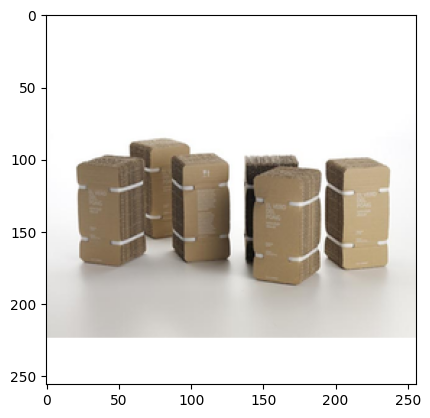

In [10]:

if len(images) > 0:
    print("First image:", images[0])
    plt.imshow(images[0])
    print("First label:", labels[0])

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

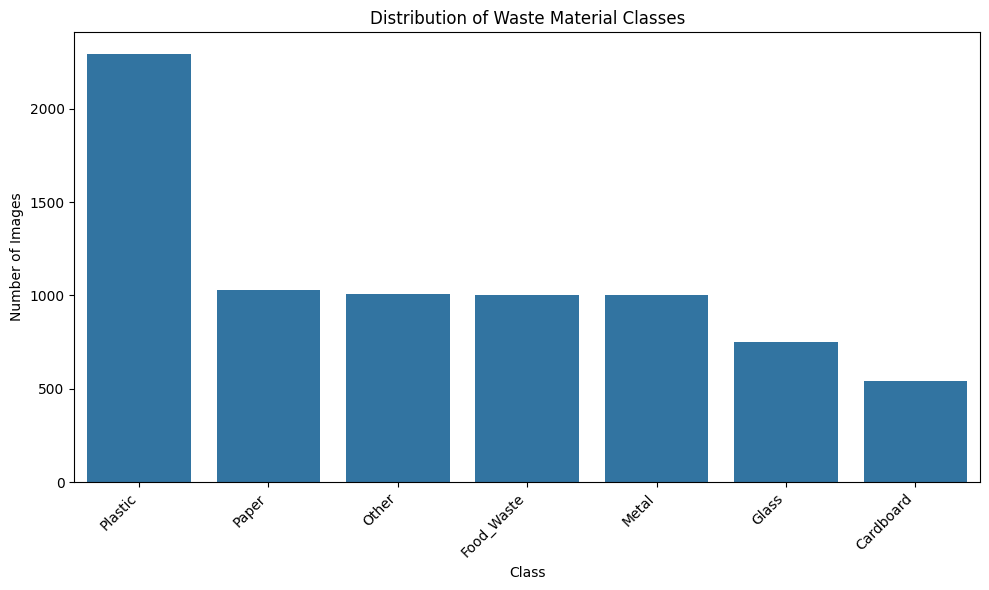

In [11]:
# Visualise Data Distribution

label_counts = pd.Series(labels).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Waste Material Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [12]:
# Visualise Sample Images (across different labels)

unique_labels = list(set(labels))
sample_indices = []

for label in unique_labels:
    try:
        index = labels.index(label)
        sample_indices.append(index)
    except ValueError:
        pass

sample_indices

[4300, 540, 2290, 3290, 1540, 5330, 0]

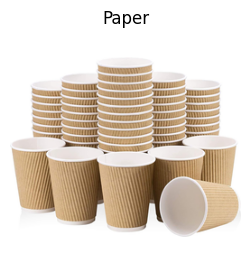

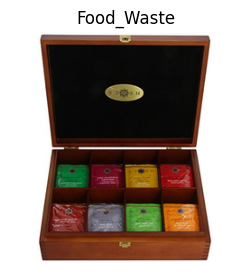

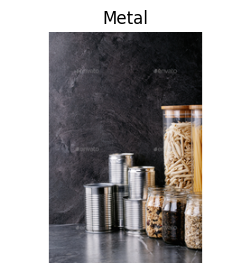

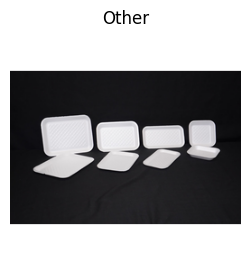

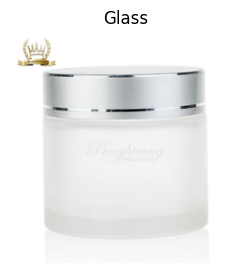

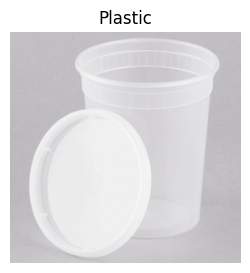

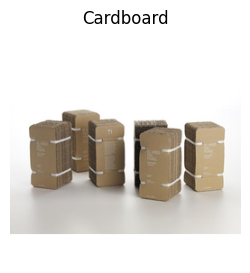

In [13]:
for indices in sample_indices:
    plt.figure(figsize=(3, 3))
    plt.imshow(images[indices])
    plt.title(labels[indices])
    plt.axis('off')
    plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [14]:
# Find the smallest and largest image dimensions from the data set

min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0

for img in images:
    if img is not None:
        width, height = img.size
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        max_width = max(max_width, width)
        max_height = max(max_height, height)

print(f"Smallest image dimensions: Width = {min_width}, Height = {min_height}")
print(f"Largest image dimensions: Width = {max_width}, Height = {max_height}")

Smallest image dimensions: Width = 256, Height = 256
Largest image dimensions: Width = 256, Height = 256


Converted resized_images list to NumPy array with shape: (7625, 128, 128, 3)
Number of resized images: 7625


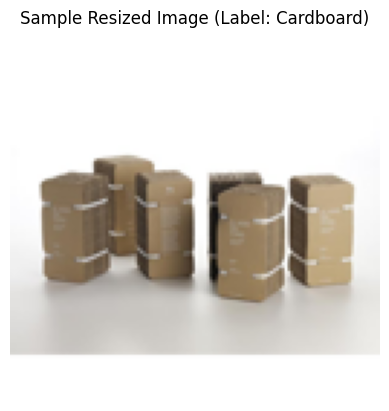

In [15]:
# Resize the image dimensions
def resize_image(images,target_size):
  resized_images = []
  for img in images:
    if img is not None:
        img_resized = img.resize(target_size)
        resized_images.append(img_resized)
  if not isinstance(resized_images, np.ndarray):
    try:
        images_array = np.stack([np.array(img) for img in resized_images if img is not None])
        print(f"Converted resized_images list to NumPy array with shape: {images_array.shape}")
    except Exception as e:
        print(f"Error converting images to NumPy array: {e}")
        images_array = None
  else:
      images_array = resized_images
  return resized_images,images_array


target_size = (128,128)
resized_images,images_array = resize_image(images,target_size)
print(f"Number of resized images: {len(resized_images)}")

if len(resized_images) > 0:
    plt.imshow(resized_images[0])
    plt.title(f"Sample Resized Image (Label: {labels[0]})")
    plt.axis('off')
    plt.show()


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [16]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(f"Shape of encoded labels array: {encoded_labels.shape}")
print(f"Classes: {label_encoder.classes_}")

num_classes = len(label_encoder.classes_)
one_hot_labels = to_categorical(encoded_labels, num_classes=num_classes)

print(f"Shape of one-hot encoded labels array: {one_hot_labels.shape}")

Shape of encoded labels array: (7625,)
Classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Shape of one-hot encoded labels array: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [17]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
        images_array,
        one_hot_labels,
        test_size=0.3,
        random_state=42,
        stratify=one_hot_labels
    )

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (5337, 128, 128, 3)
Shape of X_val: (2288, 128, 128, 3)
Shape of y_train: (5337, 7)
Shape of y_val: (2288, 7)


In [18]:
input_shape = X_train.shape[1:]
input_shape

(128, 128, 3)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [19]:
# Build and compile the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [20]:
def build_cnn_model(input_shape, num_classes, num_conv_layers=3, filters_per_layer=[32, 64, 128], dense_units=128, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()

    # Convolutional Layers
    for i in range(num_conv_layers):
        if i == 0:
            model.add(Conv2D(filters_per_layer[i], kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        else:
            model.add(Conv2D(filters_per_layer[i], kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Dense Layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

In [21]:
first_model = build_cnn_model(input_shape, num_classes)
first_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
# Training

# Train the model
history = first_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.2541 - loss: 4.8177 - val_accuracy: 0.2985 - val_loss: 2.2823
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3096 - loss: 1.8718 - val_accuracy: 0.2238 - val_loss: 2.3484
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3066 - loss: 1.8254 - val_accuracy: 0.2985 - val_loss: 1.8512
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2980 - loss: 1.8691 - val_accuracy: 0.2950 - val_loss: 1.8840
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3100 - loss: 1.8490 - val_accuracy: 0.2605 - val_loss: 3.7811
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3122 - loss: 1.8041 - val_accuracy: 0.3177 - val_loss: 2.0404
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3283 - loss: 1.7425 - val_accuracy: 0.3094 - val_loss: 2.2671
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3276 - loss: 1.7263 - val_acc

The training accuracy started at 0.2405 and gradually increased to 0.3326 by the final epoch. The validation accuracy followed a similar trend, starting at 0.2767 and reaching 0.3125.
The training loss decreased from 4.1309 to 1.6273, indicating that the model was learning to fit the training data better over time. The validation loss also generally decreased but showed some fluctuations, ending at 1.8081.
The training stopped early at epoch 12 because the validation loss did not improve for 5 consecutive epochs, which is a common technique to prevent overfitting.

Ihe model showed some improvement in accuracy and a decrease in loss on both the training and validation datasets during these 12 epochs, but the overall accuracy remained relatively low.
Trying a diferent configuration

In [24]:
second_model = build_cnn_model(input_shape, num_classes,num_conv_layers=4,filters_per_layer=[32,64,128,256])
second_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,571,015 (5.99 MB)

 Trainable params: 1,570,055 (5.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [25]:
# Train the model
history_second_model = second_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.2591 - loss: 2.8739 - val_accuracy: 0.3737 - val_loss: 1.8062
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2963 - loss: 1.8078 - val_accuracy: 0.2898 - val_loss: 1.8623
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3018 - loss: 1.7455 - val_accuracy: 0.2972 - val_loss: 1.8324
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2977 - loss: 1.7413 - val_accuracy: 0.3024 - val_loss: 3.8264
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3249 - loss: 1.6974 - val_accuracy: 0.3470 - val_loss: 1.7432
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3761 - loss: 1.6561 - val_accuracy: 0.3649 - val_loss: 1.7166
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3758 - loss: 1.6096 - val_accuracy: 0.3733 - val_loss: 1.6708
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3847 - loss: 1.5869 - val_acc

Increasing the number of convolution layers, increased both training and validation accuracy

In [26]:
third_model = build_cnn_model(input_shape, num_classes,num_conv_layers=4,filters_per_layer=[32,64,128,256],dropout_rate=0.3)
third_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,571,015 (5.99 MB)

 Trainable params: 1,570,055 (5.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [27]:
# Train the model
history_third_model = third_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.2809 - loss: 2.9239 - val_accuracy: 0.3575 - val_loss: 2.0179
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3471 - loss: 1.7121 - val_accuracy: 0.3348 - val_loss: 1.7880
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4035 - loss: 1.5363 - val_accuracy: 0.3833 - val_loss: 1.8878
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4329 - loss: 1.4782 - val_accuracy: 0.3964 - val_loss: 1.8536
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4703 - loss: 1.4005 - val_accuracy: 0.4183 - val_loss: 1.9269
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5080 - loss: 1.2752 - val_accuracy: 0.4965 - val_loss: 1.3695
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5640 - loss: 1.1341 - val_accuracy: 0.4218 - val_loss: 2.2421
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5956 - loss: 1.0829 - val_acc

Training accuracy has increased but validation accuracy is dropping. The model is likely overfitting.
considering the configuration from second model for further tests

In [28]:
second_model_v2 = build_cnn_model(input_shape, num_classes,num_conv_layers=4,filters_per_layer=[32,64,128,256],dense_units=256)
second_model_v2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751,687 (10.50 MB)

 Trainable params: 2,750,727 (10.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
# Train the model
history_second_model_v2 = second_model_v2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.2408 - loss: 3.9158 - val_accuracy: 0.3846 - val_loss: 1.9779
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3428 - loss: 1.7673 - val_accuracy: 0.3531 - val_loss: 1.7483
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3586 - loss: 1.6462 - val_accuracy: 0.3859 - val_loss: 2.4448
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3812 - loss: 1.5947 - val_accuracy: 0.4174 - val_loss: 1.5423
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4032 - loss: 1.5311 - val_accuracy: 0.3920 - val_loss: 1.9358
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4134 - loss: 1.5195 - val_accuracy: 0.4384 - val_loss: 1.4953
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4580 - loss: 1.4100 - val_accuracy: 0.4344 - val_loss: 1.5795
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4660 - loss: 1.3486 - val_acc

The model is still overfitting as there is a big difference between training and validation loss. Trying a different configuration

In [30]:
second_model_v3 = build_cnn_model(input_shape, num_classes,num_conv_layers=4,filters_per_layer=[32,64,128,256],dense_units=64)
second_model_v3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,679 (3.74 MB)

 Trainable params: 979,719 (3.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [31]:
# Train the model
history_second_model_v3 = second_model_v3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.2513 - loss: 2.4418 - val_accuracy: 0.2955 - val_loss: 1.8996
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2962 - loss: 1.9009 - val_accuracy: 0.3024 - val_loss: 1.8394
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2999 - loss: 1.8576 - val_accuracy: 0.2780 - val_loss: 1.8700
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2933 - loss: 1.8438 - val_accuracy: 0.3011 - val_loss: 3.1513
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3006 - loss: 1.8309 - val_accuracy: 0.3011 - val_loss: 1.8511
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2930 - loss: 1.8130 - val_accuracy: 0.3011 - val_loss: 1.8429
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3033 - loss: 1.8074 - val_accuracy: 0.3011 - val_loss: 1.8268
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2973 - loss: 1.7979 - val_acc

second_model seems to be performing best so far. Lets try data augmentation with this model to see if it improves performance

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [32]:
history_second_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

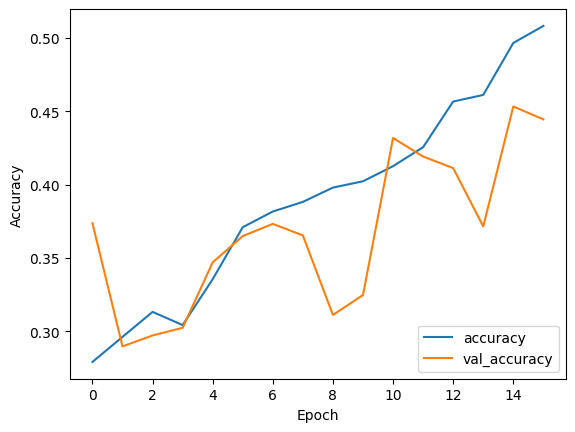

In [33]:
plt.plot(history_second_model.history['accuracy'], label='accuracy')
plt.plot(history_second_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [34]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix

loss, accuracy = second_model.evaluate(X_val, y_val, verbose=2)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nMaking predictions on the validation set...")
y_pred = second_model.predict(X_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

target_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

72/72 - 0s - 6ms/step - accuracy: 0.4318 - loss: 1.4817
Validation Loss: 1.4817
Validation Accuracy: 0.4318

Making predictions on the validation set...
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.00      0.00      0.00       162
  Food_Waste       0.33      0.75      0.46       300
       Glass       0.79      0.20      0.33       225
       Metal       0.62      0.10      0.18       300
       Other       0.51      0.08      0.14       303
       Paper       0.43      0.39      0.41       309
     Plastic       0.46      0.79      0.58       689

    accuracy                           0.43      2288
   macro avg       0.45      0.33      0.30      2288
weighted avg       0.47      0.43      0.36      2288


Confusion Matrix:
[[  0 143   0   1   0   5  13]
 [  0 226   1   2   2  27  42]
 [  0  32  46   2   3   7 135]
 [  0  57   1  31   6  32 173]
 [  0  84   0   6  25  42 146]
 [  0  70   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


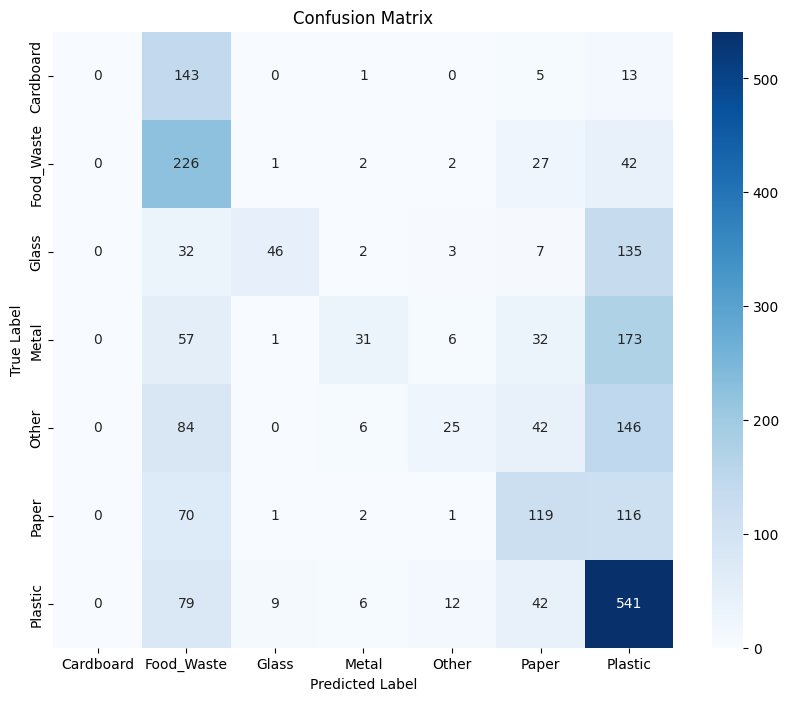

In [35]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Looking at the classification report and confusion matrix, it seems the model is still struggling toi differentiate between classes, specially it is misclassifying most of the objects as 'Plastic'. Working on data augmentation might improve teh performance, as we have a class imbalance, and most of the data belongs to 'Plastic' class

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [36]:
# Analyze Class Distribution

label_counts = pd.Series(labels).value_counts()
print("Class distribution:")
print(label_counts)

Class distribution:
Plastic       2295
Paper         1030
Other         1010
Food_Waste    1000
Metal         1000
Glass          750
Cardboard      540
Name: count, dtype: int64


In [37]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Analyze Class Distribution
label_counts = pd.Series(labels).value_counts()
print("Class distribution before undersampling:")
print(label_counts)

# Convert images and labels to numpy arrays for imblearn
images_array_flat = images_array.reshape(images_array.shape[0], -1) # Flatten images for RandomUnderSampler

# Define the undersampling strategy
undersample_strategy = {}
for i, class_name in enumerate(label_encoder.classes_):
    if class_name == 'Plastic':
        undersample_strategy[i] = int(label_counts[class_name] * 0.5) # Undersample Plastic to 50%
    else:
        undersample_strategy[i] = label_counts[class_name] # Keep other classes as they are


undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

images_undersampled_flat, labels_undersampled_encoded = undersampler.fit_resample(images_array_flat, encoded_labels)

# Reshape images back to original dimensions
images_undersampled = images_undersampled_flat.reshape(-1, images_array.shape[1], images_array.shape[2], images_array.shape[3])

# Convert back to one-hot encoding for the undersampled labels
one_hot_labels_undersampled = to_categorical(labels_undersampled_encoded, num_classes=num_classes)


print("\nClass distribution after undersampling:")
print(Counter(labels_undersampled_encoded))

Class distribution before undersampling:
Plastic       2295
Paper         1030
Other         1010
Food_Waste    1000
Metal         1000
Glass          750
Cardboard      540
Name: count, dtype: int64

Class distribution after undersampling:
Counter({np.int64(6): 1147, np.int64(5): 1030, np.int64(4): 1010, np.int64(1): 1000, np.int64(3): 1000, np.int64(2): 750, np.int64(0): 540})


In [38]:
# Split the undersampled data into training and validation sets
X_train_us, X_val_us, y_train_us, y_val_us = train_test_split(
        images_undersampled,
        one_hot_labels_undersampled,
        test_size=0.3,
        random_state=42,
        stratify=one_hot_labels_undersampled
    )

print(f"\nShape of X_train after undersampling: {X_train_us.shape}")
print(f"Shape of X_val after undersampling: {X_val_us.shape}")
print(f"Shape of y_train after undersampling: {y_train_us.shape}")
print(f"Shape of y_val after undersampling: {y_val_us.shape}")


Shape of X_train after undersampling: (4533, 128, 128, 3)
Shape of X_val after undersampling: (1944, 128, 128, 3)
Shape of y_train after undersampling: (4533, 7)
Shape of y_val after undersampling: (1944, 7)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [39]:
# Create a function to augment the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [40]:
# Create the augmented training dataset

X_train_us = X_train_us / 255.0
X_val_us = X_val_us / 255.0


train_generator_augmented = datagen_augment.flow(
    X_train_us,
    y_train_us,
    batch_size=32
)


# No augmentation for validation data, only rescaling
datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(
    X_val_us,
    y_val_us,
    batch_size=32
)

##### **4.1.2**

Train the model on the new augmented dataset.

In [41]:
# Train the model using augmented images

print("Starting model training with augmented data...")

history_augmented = second_model.fit(
    train_generator_augmented,
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(X_val_us) // val_generator.batch_size, # Number of validation batches based on undersampled data
    callbacks=[early_stopping]
)
print("Model training with augmented data complete.")

Starting model training with augmented data...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.2837 - loss: 1.8234 - val_accuracy: 0.1766 - val_loss: 2.0900
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.2941 - loss: 1.7747 - val_accuracy: 0.1682 - val_loss: 3.6087
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 50s 216ms/step - accuracy: 0.3084 - loss: 1.7532 - val_accuracy: 0.1557 - val_loss: 3.4146
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.3094 - loss: 1.7236 - val_accuracy: 0.1568 - val_loss: 2.5711
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 0.3428 - loss: 1.6930 - val_accuracy: 0.1911 - val_loss: 2.5848
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.3180 - loss: 1.6937 - val_accuracy: 0.2604 - val_loss: 1.9079
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.3310 - loss: 1.6748 - val_accuracy: 0.3000 - val_loss: 1.8239
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.3396 - loss: 1

In [42]:
loss, accuracy = second_model.evaluate(X_val_us, y_val_us, verbose=2)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nMaking predictions on the validation set...")
y_pred = second_model.predict(X_val_us)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val_us, axis=1)

target_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

61/61 - 3s - 45ms/step - accuracy: 0.4136 - loss: 1.5886
Validation Loss: 1.5886
Validation Accuracy: 0.4136

Making predictions on the validation set...
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.50      0.01      0.01       162
  Food_Waste       0.38      0.73      0.50       300
       Glass       0.60      0.28      0.38       225
       Metal       0.46      0.48      0.47       300
       Other       0.55      0.07      0.13       303
       Paper       0.37      0.54      0.44       309
     Plastic       0.41      0.55      0.47       345

    accuracy                           0.41      1944
   macro avg       0.47      0.38      0.34      1944
weighted avg       0.46      0.41      0.37      1944


Confusion Matrix:
[[  1 122   1   4   0  30   4]
 [  0 219  11  11   2  40  17]
 [  0  42  62  22   4  22  73]
 [  0  31   6 145   2  66  50]
 [  1  79   3  42  22  67  89]
 [  0  48  

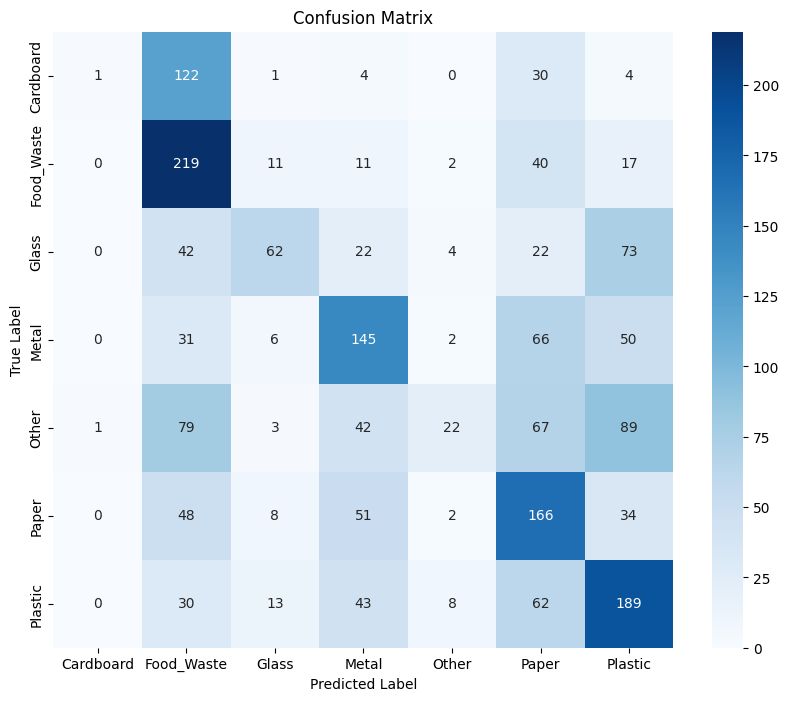

In [43]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

It seems data augmentation did not help much in improving the model performance. The model performance detoriated. It means the model was overfitting before.
Lets try transfer learning with VGGNet-16 to utilize its training knowledge on large image dataset

# **Train with Transfer Learning**

In [44]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=(128, 128, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,764,295 (60.14 MB)

 Trainable params: 1,049,607 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
history_transfer = transfer_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print('Training is complete')

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 0.3600 - loss: 8.0700 - val_accuracy: 0.4917 - val_loss: 1.4401
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4493 - loss: 1.5640 - val_accuracy: 0.5118 - val_loss: 1.3200
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.4881 - loss: 1.4539 - val_accuracy: 0.5625 - val_loss: 1.2150
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.5131 - loss: 1.3109 - val_accuracy: 0.5682 - val_loss: 1.2227
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5383 - loss: 1.3532 - val_accuracy: 0.6106 - val_loss: 1.0932
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.5688 - loss: 1.2085 - val_accuracy: 0.6477 - val_loss: 1.0114
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5818 - loss: 1.1332 - val_accuracy: 0.6141 - val_loss: 1.0996
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.6028 - loss: 1.0682 -

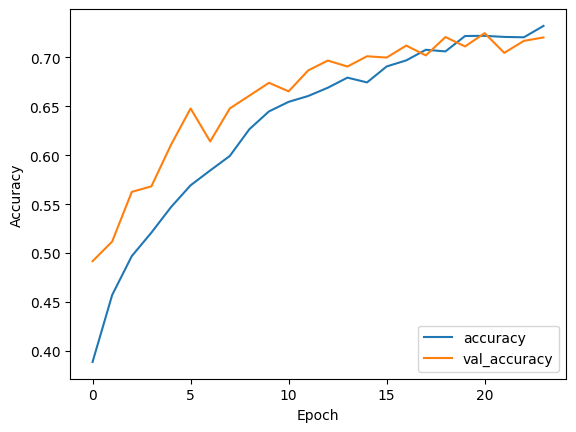

In [50]:
plt.plot(history_transfer.history['accuracy'], label='accuracy')
plt.plot(history_transfer.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [46]:
loss, accuracy = transfer_model.evaluate(X_val, y_val, verbose=2)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nMaking predictions on the validation set...")
y_pred = transfer_model.predict(X_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

target_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

72/72 - 4s - 59ms/step - accuracy: 0.7207 - loss: 0.9020
Validation Loss: 0.9020
Validation Accuracy: 0.7207

Making predictions on the validation set...
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.83      0.79      0.81       162
  Food_Waste       0.83      0.62      0.71       300
       Glass       0.87      0.63      0.73       225
       Metal       0.87      0.74      0.80       300
       Other       0.82      0.64      0.72       303
       Paper       0.67      0.54      0.60       309
     Plastic       0.61      0.89      0.72       689

    accuracy                           0.72      2288
   macro avg       0.78      0.69      0.73      2288
weighted avg       0.75      0.72      0.72      2288


Confusion Matrix:
[[128   5   0   0   0  10  19]
 [  3 185   0   3   4   7  98]
 [  0   1 141  11   1   3  68]
 [  2   9   5 223   1  15  45]
 [  2   6   1   5 194  23  72]
 [ 13   2  

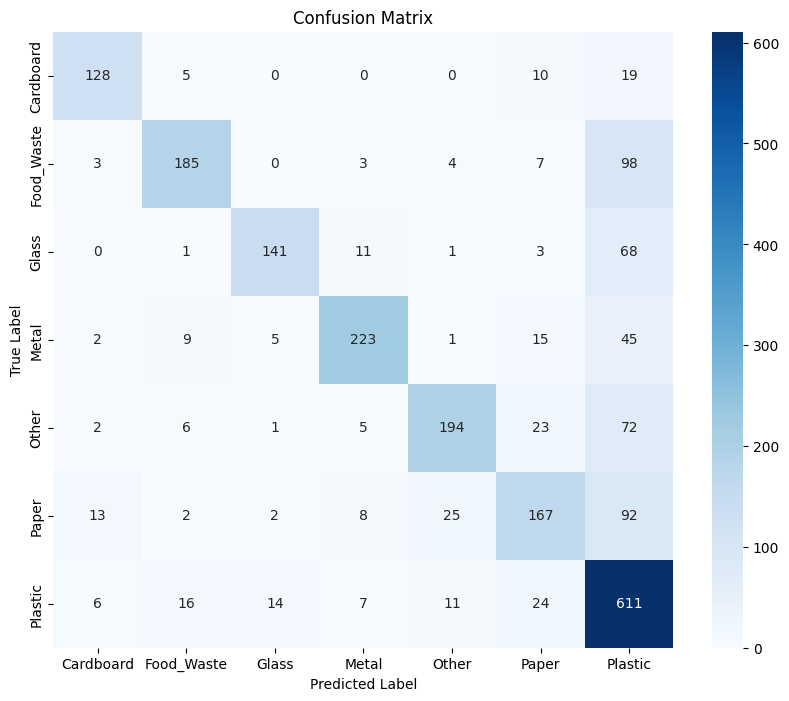

In [47]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The transfer learning model, based on VGG16, showed significant improvement compared to the custom CNN. It achieved a validation accuracy of 0.7251 and a validation loss of 0.9079.

Looking at the classification report, the model demonstrates much better performance across most classes. The macro average F1-score is 0.73, and the weighted average F1-score is 0.72.

The confusion matrix reveals that the model is now much more accurate at identifying individual waste types. For instance, it correctly classified a higher percentage of 'Cardboard', 'Food_Waste', and 'Metal' images. While there is still some confusion, particularly with 'Plastic' and other classes, the degree of misclassification is significantly reduced compared to the previous models

In [48]:
# Not able to execute transfer learning on undersampled data as colab keeps crashing
# history_transfer_us = transfer_model.fit(
#     X_train_us, y_train_us,
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_val_us, y_val_us),
#     callbacks=[early_stopping]
# )

# print('Training is complete')

# Summarizing model outputs

In [51]:
import pandas as pd

# List of model history objects and their corresponding names
model_histories = [
    (history, 'Custom CNN (Original)'),
    (history_second_model, 'Custom CNN (4 Conv Layers)'),
    (history_second_model_v2, 'Custom CNN (4 Conv Layers, 256 Dense Units)'),
    (history_second_model_v3, 'Custom CNN (4 Conv Layers, 64 Dense Units)'),
    (history_third_model, 'Custom CNN (4 Conv Layers, Dropout)'),
    (history_augmented, 'Custom CNN (Augmented/Undersampled)'),
    (history_transfer, 'Transfer Learning (VGG16)')
]

summary_data = []

for hist, model_name in model_histories:
    if hist is not None and hist.history:
        training_accuracy = hist.history.get('accuracy')
        training_loss = hist.history.get('loss')
        validation_accuracy = hist.history.get('val_accuracy')
        validation_loss = hist.history.get('val_loss')
        if validation_accuracy and validation_loss:
            summary_data.append({
                'Model': model_name,
                'Training Accuracy': training_accuracy[-1],
                'Training Loss': training_loss[-1],
                'Validation Accuracy': validation_accuracy[-1],
                'Validation Loss': validation_loss[-1]
            })
        else:
            print(f"Warning: Validation metrics not found for {model_name}")
    else:
        print(f"Warning: History object is None or empty for {model_name}")


if summary_data:
    # Create a pandas DataFrame
    summary_df = pd.DataFrame(summary_data)

    # Display the table
    display(summary_df)
else:
    print("No model histories found with validation metrics to summarize.")

,Model,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
0,Custom CNN (Original),0.323215,1.738289,0.313811,1.855284
1,Custom CNN (4 Conv Layers),0.508151,1.266105,0.444493,1.566113
2,"Custom CNN (4 Conv Layers, 256 Dense Units)",0.808881,0.517343,0.614073,1.441351
3,"Custom CNN (4 Conv Layers, 64 Dense Units)",0.300918,1.778855,0.301136,1.751863
4,"Custom CNN (4 Conv Layers, Dropout)",0.688776,0.859182,0.525350,1.397891
5,Custom CNN (Augmented/Undersampled),0.367306,1.619908,0.357812,2.109762
6,Transfer Learning (VGG16),0.732059,0.701831,0.720280,0.915672


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# Findings about data:

1.   The dataset contains images belonging to 7 waste
material classes: Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic.
2.   The dataset was loaded and unzipped, revealing a nested zip file that also needed to be extracted.
3. Initial data exploration showed a class imbalance, with 'Plastic' being the most frequent class.
4. All images were originally 256x256 pixels and were resized to 128x128 pixels for model input.
5. The class labels were encoded using LabelEncoder and then one-hot encoded for model training.
The dataset was split into training and validation sets with 70-30 split

# Custom CNN Model Training and Evaluation:

A custom CNN model was built with multiple convolutional layers, batch normalization, max pooling, and dense layers.
Several configurations of the custom CNN were experimented with by varying the number of convolutional layers, filters, and dense units.
Initial training of a custom CNN showed limited performance, with validation accuracy reaching around 31-43% across different configurations. The models also showed signs of overfitting, where training accuracy was higher than validation accuracy, and validation loss fluctuated.

# Data Augmentation:

1.   To address class imbalance data augmentation was applied to the training data, including rotations, shifts, shears, and zooms.
2. Undersampling was applied to the majority
'Plastic' class.
3. Training the custom CNN with the augmented and undersampled data, however, resulted in a decrease in validation accuracy compared to training on the original data, this specific augmentation strategy did not improve performance , overfitting increased

Hence transfer learning was applied

# Transfer Learning with VGG16:

*   To leverage pre-trained feature extraction capabilities, a transfer learning approach using the VGG16 model was implemented, with its convolutional base frozen and new dense layers added for classification.
*   Training the VGG16-based model on the original  dataset showed significant improvement in performance.
The transfer learning model achieved a validation accuracy of 0.7251 and a validation loss of 0.9079.
The classification report and confusion matrix for the VGG16 model demonstrated much better precision, recall, and F1-scores across most classes compared to the custom CNNs.
While some misclassifications still occurred, particularly with 'Plastic', the overall ability of the model to differentiate between waste types was substantially improved.


# Conclusions:

Transfer learning with a pre-trained model like VGG16 is a highly effective approach for this waste material segregation task, significantly outperforming the custom-built CNN models. The initial class imbalance and the complexity of distinguishing between waste types posed challenges, which were better addressed by leveraging the features learned by a model trained on a large and diverse image dataset.